# <center> <span style="color:indigo">        Visualización de grandes bases de datos</span> </center> 
##  <center> <span style="color:DarkBlue">          Challengue 2. </span>  </center>
##  <center> <span style="color:DarkBlue"> Hugo Fernando Abarca Jimenez </span>  </center>
##  <center> <span style="color:DarkBlue"> hugo.abarca1902@alumnos.udg.mx </span>  </center>
##  <center> <span style="color:DarkBlue"> Noviembre de 2024</span>  </center>


## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
from pyspark import SparkContext
import re
import csv
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_date,year
from pyspark.sql.functions import avg
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import StandardScaler
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor, DecisionTreeRegressor, LinearRegression
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import MinMaxScaler
from pyspark.sql.types import * 
from pyspark.sql.functions import *
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.types import * 
from pyspark.sql.functions import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import MinMaxScaler

from pyspark.ml.classification import *
from pyspark.ml.evaluation import *
from pyspark.sql.functions import *
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder ## Aqui se incluye la parte de Cross Validation
from pyspark.ml.regression import GBTRegressor

In [0]:
# File location and type
file_location = "/FileStore/tables/winequality_red.csv"
file_type = "csv"

# CSV options
infer_schema = "True"
first_row_is_header = "True"
delimiter = ";"

# The applied options are for CSV files. For other file types, these will be ignored.
red_wine = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(red_wine)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7.9,0.6,0.06,1.6,0.069,15.0,59.0,0.9964,3.3,0.46,9.4,5
7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5,5


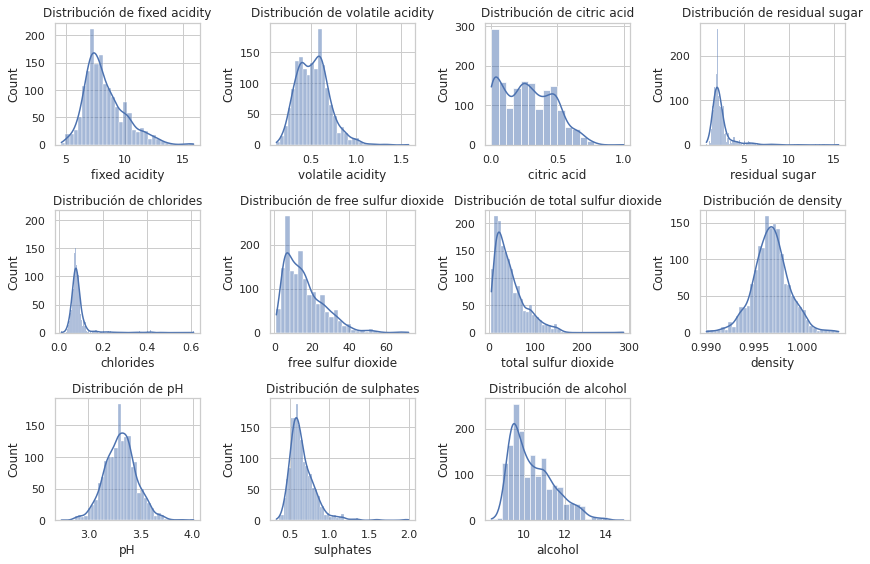

In [0]:
white_red_pd = red_wine.toPandas()
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
for i, column in enumerate(white_red_pd.columns):
    if white_red_pd[column].dtype in ['int64', 'float64']: 
        plt.subplot(3, 4, i + 1)
        sns.histplot(white_red_pd[column], kde=True) 
        plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

In [0]:
# File location and type
file_location = "/FileStore/tables/winequality_white.csv"
file_type = "csv"

# CSV options
infer_schema = "True"
first_row_is_header = "True"
delimiter = ";"

# The applied options are for CSV files. For other file types, these will be ignored.
white_wine = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(white_wine)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6
8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6
7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6
8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6
8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


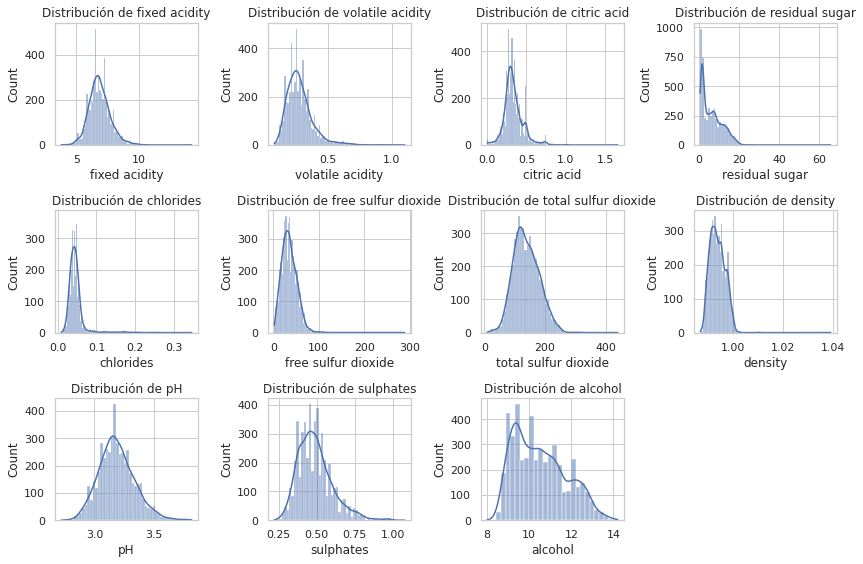

In [0]:
white_wine_pd = white_wine.toPandas()
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
for i, column in enumerate(white_wine_pd.columns):
    if white_wine_pd[column].dtype in ['int64', 'float64']: 
        plt.subplot(3, 4, i + 1)
        sns.histplot(white_wine_pd[column], kde=True) 
        plt.title(f'Distribución de {column}')

plt.tight_layout()
plt.show()

https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution

In [0]:
def df_treat(df,input_columns,treat_outlayers=False,treat_negative=False):
    numeric_input =[]
    string_input = []
    df_indexed=df
    for column in input_columns: # se va por cada variable
        if str(df_indexed.schema[column].dataType)=='StringType()':
            indexer = StringIndexer(inputCol=column,
                                    outputCol=column+'_num') # funciond e indexeo
            df_indexed = indexer.fit(df_indexed).transform(df_indexed)
            new_col_name = column+'_num' # este nuevo nombre es el que se agrega a las listas vacías
            string_input.append(new_col_name)
        else:
            numeric_input.append(column)
    print("numeric input",numeric_input)
    print("string_input",string_input)
        # creamos un diccionario vacío
    
    if treat_outlayers:
        d = {} #aqui vamos a guardar los percentiles 1 y 99

        for col in numeric_input:
            d[col] = df_indexed.approxQuantile(col,
                                            [0.01,0.99],
                                            0.25)
        # checamos la asimetría de todas las columnas numéricas
        for col in numeric_input:
            skew = df_indexed.agg(skewness(df_indexed[col])).collect()
            skew = skew[0][0]

            if skew > 1: # si se tiene asimetría positiva, se hace tranformación log
                df_indexed = df_indexed.withColumn(col,
                                                log(when(df[col] < d[col][0],d[col][0]).when(df_indexed[col] > d[col][1], d[col][1]).otherwise(df_indexed[col] ) +1).alias(col))
                print("La variable "+col+" ha sido tratada para asimetría positiva con coeficiente = ",skew)
            elif skew < -1:
                df_indexed = df_indexed.withColumn(col,
                                                exp(when(df[col] < d[col][0],d[col][0]).when(df_indexed[col] > d[col][1], d[col][1]).otherwise(df_indexed[col] ) +1).alias(col))
                print("La variable "+col+" ha sido tratada para asimetría negativa con coeficiente = ",skew)
    
        #checamos valores negativos en el data frame
    # Que se produzca una advertencia si encuentra alguna valor negativo
    ## Nota: se tienen que checar los inputs numericos ya que cualquier cosa que se encuentre indexeada no tendra valores negativos

    # Calculamos los valores minimos para todas las columnas del dataframe
    minimums = df.select([min(c).alias(c) for c in df.columns if c in numeric_input])

    # Creamos un array con todos los minimos y seleccionamos solo las columnas con valores de entrada
    min_array = minimums.select(array(numeric_input).alias("mins"))

    # Lo siguiente es collectar los minimos globales como objeto en python
    # aqui tambien se utiliza una funcion array_min en lugar de min, para spark sql
    df_minimum = min_array.select(min(min_array.mins)).collect()

    # Ahora tenemos que cortar lo anterior al número que necesitamos
    df_minimum = df_minimum[0][0][0]

    # Si hay algún valor negativo en el DF, se da un mensaje
    if df_minimum < 0:
        print("ATENCION: Existen valores negativos en el DataSet")
    else:
        print("No se encuentran valores negativos en el DataSet")
    
        # Antes de cooregir los valores negativos, se tiene que vectorizar lo que hemos hecho
    salida=['quality']
    features_list = numeric_input + salida
    # Creamos el objeto de VectorAssembler
    assembler = VectorAssembler(inputCols=features_list,
                                outputCol="features")
    # Utilizamos este assembler para trasformar los datos
    df_output = assembler.transform(df_indexed).select("features","quality")

        ### Si hubiera que hacer algun cambio si tuvieramos numeros negativos
    # Se tiene una funcion llamada min max scaler, que ajusta los valores de una columna a un rango espeficico
    #reescalar valores numéricos

    if treat_negative:
        scaler = MinMaxScaler(inputCol='features',
                            outputCol="scaledFeatures") #el vector que ya habiamos creado
        print("Features escalados a un rango de: [%f,%f]" % (scaler.getMin(), scaler.getMax())) 

        # Generar el modelo MinMaxScalerModel
        scalerModel = scaler.fit(df_output)

        # Reescalar cada feature al rango indicado
        df_scaled = scalerModel.transform(df_output)

        df_final = df_scaled.select("quality",'scaledFeatures')
        df_final = df_final.withColumnRenamed('scaledFeatures','features')
        print("listo")

    else:
        print("warning:no hay correciones de valores negativos")
        df_final = df_output
        
    return df_final

In [0]:
print('Procesando datos de la tabla red_wine')
input_columns = red_wine.columns[:-1] 
red_wine_final=df_treat(df=red_wine,
                    input_columns=input_columns,
                    treat_outlayers=True,
                    treat_negative=True)
print('Procesando datos de la tabla white_wine')
input_columns = red_wine.columns[:-1] 
white_wine_final=df_treat(df=white_wine,
                    input_columns=input_columns,
                    treat_outlayers=True,
                    treat_negative=True)

Procesando datos de la tabla red_wine
numeric input ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
string_input []
La variable residual sugar ha sido tratada para asimetría positiva con coeficiente =  4.536394788805636
La variable chlorides ha sido tratada para asimetría positiva con coeficiente =  5.6750165275042646
La variable free sulfur dioxide ha sido tratada para asimetría positiva con coeficiente =  1.2493938474342596
La variable total sulfur dioxide ha sido tratada para asimetría positiva con coeficiente =  1.5141091878506623
La variable sulphates ha sido tratada para asimetría positiva con coeficiente =  2.426393455449086
No se encuentran valores negativos en el DataSet
Features escalados a un rango de: [0.000000,1.000000]
listo
Procesando datos de la tabla white_wine
numeric input ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'c

In [0]:
red_wine_final.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


,quality,features
0,5,"[0.24778761061946908, 0.3972602739726027, 0.0,..."
1,5,"[0.2831858407079646, 0.5205479452054794, 0.0, ..."
2,5,"[0.2831858407079646, 0.4383561643835616, 0.04,..."
3,6,"[0.5840707964601769, 0.10958904109589043, 0.56..."
4,5,"[0.24778761061946908, 0.3972602739726027, 0.0,..."
...,...,...
1594,5,"[0.14159292035398235, 0.3287671232876712, 0.08..."
1595,6,"[0.11504424778761069, 0.2945205479452055, 0.1,..."
1596,6,"[0.1504424778761062, 0.2671232876712329, 0.13,..."
1597,5,"[0.11504424778761069, 0.3595890410958904, 0.12..."


In [0]:
white_wine_final.toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


,quality,features
0,6,"[0.30769230769230776, 0.243701705547537, 0.314..."
1,6,"[0.24038461538461542, 0.278811774689598, 0.299..."
2,6,"[0.41346153846153855, 0.25549637765636957, 0.3..."
3,6,"[0.32692307692307704, 0.19557558298761316, 0.2..."
4,6,"[0.32692307692307704, 0.19557558298761316, 0.2..."
...,...,...
4893,6,"[0.23076923076923084, 0.1709223589748307, 0.26..."
4894,5,"[0.2692307692307693, 0.30177119752660675, 0.31..."
4895,6,"[0.2596153846153847, 0.20775227287696035, 0.17..."
4896,7,"[0.16346153846153852, 0.2671992615035136, 0.26..."


In [0]:
def RegTrainEval(regresor,features,folds,train,test):
    
    def FindMtype(regresor):
        # Intstantiate Model
        M = regresor
        # Learn what it is
        Mtype = type(M).__name__
        
        return Mtype
    
    Mtype = FindMtype(regresor)
    
    
    def IntanceFitModel(Mtype,regresor,features,folds,train):
        
        if Mtype == "LinearRegression":
            # Inicializar modelo base para regresión
            lr = LinearRegression(labelCol='quality', featuresCol='features')
            # Parametros de validacion cruzada:
            paramGrid = ParamGridBuilder() \
                .addGrid(lr.regParam, [0.2, 0.03]) \
                .build()
            # Inicializar validación cruzada
            crossval = CrossValidator(estimator=lr,
                                      estimatorParamMaps=paramGrid,
                                      evaluator=RegressionEvaluator(labelCol='quality', predictionCol='prediction'),
                                      numFolds=folds)
            # Se realiza la validación cruzada y se regresa el mejor set de parámetros
            fitModel = crossval.fit(train)
            print('Model=',Mtype)
            print('r2=',fitModel.bestModel.summary.r2)
            return fitModel
        
        if Mtype == "RandomForestRegressor":
            # Inicializar modelo base para regresión
            lr = RandomForestRegressor(labelCol='quality', featuresCol='features')
            # Parametros de validacion cruzada:
            paramGrid = ParamGridBuilder() \
                .addGrid(lr.numTrees, [20, 30]) \
                .addGrid(lr.maxDepth, [20, 30]) \
                .build()
            # Inicializar validación cruzada
            crossval = CrossValidator(estimator=lr,
                                      estimatorParamMaps=paramGrid,
                                      evaluator=RegressionEvaluator(labelCol='quality', predictionCol='prediction'),
                                      numFolds=folds)
            # Se realiza la validación cruzada y se regresa el mejor set de parámetros
            fitModel = crossval.fit(train)
            print('Model=',Mtype)
            # print('rmse=',fitModel.bestModel.summary.r2)
            return fitModel
        
        if Mtype == "DecisionTreeRegressor":
            # Inicializar modelo base para regresión
            lr = DecisionTreeRegressor(labelCol='quality', featuresCol='features')
            # Parametros de validacion cruzada:
            paramGrid = ParamGridBuilder() \
                .addGrid(lr.maxDepth, [20, 30]) \
                .build()
            # Inicializar validación cruzada
            crossval = CrossValidator(estimator=lr,
                                      estimatorParamMaps=paramGrid,
                                      evaluator=RegressionEvaluator(labelCol='quality', predictionCol='prediction'),
                                      numFolds=folds)
            # Se realiza la validación cruzada y se regresa el mejor set de parámetros
            fitModel = crossval.fit(train)
            print('Model=',Mtype)
            # print('rmse=',fitModel.bestModel.summary.r2)
            return fitModel
        
        if Mtype == "GBTRegressor":
            # Inicializar modelo base para regresión
            lr = GBTRegressor(labelCol='quality', featuresCol='features')
            # Parametros de validacion cruzada:
            paramGrid = ParamGridBuilder() \
                .addGrid(lr.maxDepth, [5, 10]) \
                .addGrid(lr.maxIter, [10, 20]) \
                .build()
            # Inicializar validación cruzada
            crossval = CrossValidator(estimator=lr,
                                      estimatorParamMaps=paramGrid,
                                      evaluator=RegressionEvaluator(labelCol='quality', predictionCol='prediction'),
                                      numFolds=folds)
            # Se realiza la validación cruzada y se regresa el mejor set de parámetros
            fitModel = crossval.fit(train)
            print('Model=',Mtype)
            # print('rmse=',fitModel.bestModel.summary.r2)
            return fitModel
        
    fitModel = IntanceFitModel(Mtype,regresor,features,folds,train)
       

    # if Mtype in("LinearRegression"):
    #     # Get Best Model
    #     BestModel = fitModel.bestModel
    #     print(" ")
    #     print('\033[1m' + Mtype + '\033[0m')
    #     print("Intercept: " + str(BestModel.intercept))
    #     print('\033[1m' + " Top 20 Coefficients"+ '\033[0m')
    #     print("You should compares these relative to eachother")
    #     # numpy array to list
    #     coeff_array = BestModel.coefficients.toArray()
    #     coeff_scores = []
    #     for x in coeff_array:
    #         coeff_scores.append(float(x))
    #     # zip
    #     print(x)

    predictions = fitModel.transform(test)
    MC_evaluator = RegressionEvaluator(labelCol='quality', predictionCol='prediction',metricName="rmse") 
    rmse = (MC_evaluator.evaluate(predictions))
    Mtype = [Mtype] # string
    score = [str(rmse)] #string to list

    print('rmse=',rmse)
    return fitModel.bestModel

# En el análisis de la base de datos de los vinos, se evaluaron cuatro modelos: LinearRegression, GBTRegressor, RandomForestRegressor y DecisionTreeRegressor.

In [0]:
regresors = [
                LinearRegression()
                ,GBTRegressor()
               ,RandomForestRegressor()
                ,DecisionTreeRegressor()
              ] 

train,test = red_wine_final.randomSplit([0.7,0.3])
features = red_wine_final.select(['features']).collect()
folds = 2 
print('Comparando modelos para la base de datos de red wine')
for regressor in regresors:
    model = RegTrainEval(regressor,features,folds,train,test)
    predictions=model.transform(red_wine_final)
    print(predictions.show())

Comparando modelos para la base de datos de red wine
Model= LinearRegression
r2= 0.9980854320907964
rmse= 0.03714600501586205
+-------+--------------------+------------------+
|quality|            features|        prediction|
+-------+--------------------+------------------+
|      5|[0.24778761061946...| 4.999657811796122|
|      5|[0.28318584070796...| 5.005757883217289|
|      5|[0.28318584070796...|5.0091121365470705|
|      6|[0.58407079646017...| 5.985355979127517|
|      5|[0.24778761061946...| 4.999657811796122|
|      5|[0.24778761061946...|   5.0017827564847|
|      5|[0.29203539823008...| 5.003449899717782|
|      7|[0.23893805309734...| 6.906854559879127|
|      7|[0.28318584070796...| 6.908407423310273|
|      5|[0.25663716814159...| 5.043033370478817|
|      5|[0.18584070796460...|5.0023708580904644|
|      5|[0.25663716814159...| 5.043033370478817|
|      5|[0.08849557522123...| 5.007199008720104|
|      5|[0.28318584070796...| 5.046890884003901|
|      5|[0.380530973451

#Conclusión predicciones para la data de red wine
El modelo LinearRegression es el más adecuado para esta base de datos, ya que combina un ajuste muy preciso en los datos de entrenamiento con un bajo RMSE (0.037) y un alto R² (0.998), lo que indica una buena capacidad de modelar la relación entre las características y la calidad del vino. En comparación, los modelos GBTRegressor y DecisionTreeRegressor posiblemente sea un sobreajuste, ya que memorizan los datos con un RMSE de 0.0, pero es probable que tengan un desempeño deficiente en datos nuevos. Por otro lado, RandomForestRegressor presenta un error mayor (RMSE de 0.147), lo que sugiere que no es tan eficiente como LinearRegression para esta base de datos. En general, LinearRegression demuestra ser el modelo más confiable y efectivo, equilibrando precisión y generalización. 

In [0]:
train,test = white_wine_final.randomSplit([0.7,0.3])
features = white_wine_final.select(['features']).collect()
folds = 2 
print('Comparando modelos para la base de datos de white wine')
for regressor in regresors:
    model = RegTrainEval(regressor,features,folds,train,test)
    predictions=model.transform(white_wine_final)
    print(predictions.show())

Comparando modelos para la base de datos de white wine
Model= LinearRegression
r2= 0.9985458157891219
rmse= 0.03413929934532117
+-------+--------------------+------------------+
|quality|            features|        prediction|
+-------+--------------------+------------------+
|      6|[0.30769230769230...| 5.971598543088136|
|      6|[0.24038461538461...| 5.961690787803765|
|      6|[0.41346153846153...| 5.992592878448134|
|      6|[0.32692307692307...| 5.992428662190516|
|      6|[0.32692307692307...| 5.992428662190516|
|      6|[0.41346153846153...| 5.992592878448134|
|      6|[0.23076923076923...| 5.981521202315733|
|      6|[0.30769230769230...| 5.971598543088136|
|      6|[0.24038461538461...| 5.961690787803765|
|      6|[0.41346153846153...| 5.992740681718641|
|      5|[0.41346153846153...| 5.046667126307459|
|      5|[0.46153846153846...| 5.026391087687008|
|      5|[0.39423076923076...| 5.044037292177568|
|      7|[0.26923076923076...|6.9880791077378435|
|      5|[0.4326923076

#Conclusión predicciones para la data de white wine
 El modelo de regresión lineal mostró un excelente desempeño con un R² de 0.9985 y un RMSE de 0.0341, indicando que captura con gran precisión la variabilidad de la calidad del vino basada en las características proporcionadas. Por otro lado, GBTRegressor y DecisionTreeRegressor igualmente presentaron un RMSE de 0, lo cual probablemente sea un sobreajuste, ya que predicen perfectamente en el conjunto de datos. RandomForestRegressor mostró un desempeño intermedio con un RMSE de 0.1030, siendo más robusto que los modelos previamente mencionados en términos de generalización. LinearRegression se posiciona como la mejor opción para modelar la calidad del vino blanco en este análisis.